# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [2]:
import numpy as np
import pandas as pd

from statsmodels.stats.weightstats import ztest
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
# your-code

activity_pretest = pd.read_csv('./data/activity_pretest.csv')
activity_pretest

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [5]:
activity_pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   activity_level  int64 
dtypes: int64(1), object(2)
memory usage: 42.6+ MB


In [6]:
# Mean

mean = activity_pretest['activity_level'].mean()

print('Mean:', mean)

Mean: 5.243289247311828


In [7]:
# Median 

median = activity_pretest['activity_level'].median()

print('Median:', median)

Median: 1.0


In [8]:
# Standard deviation

std_dev = activity_pretest['activity_level'].std()

print('Standard deviation:', std_dev)

Standard deviation: 6.520995692123585


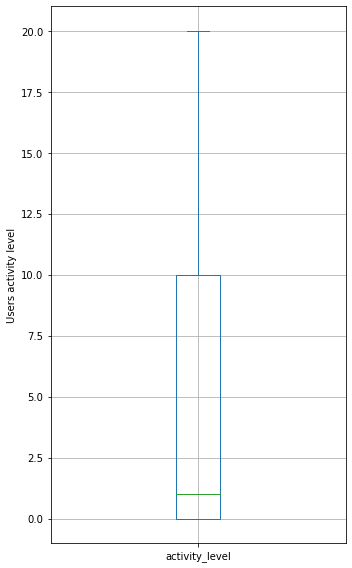

In [9]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data = activity_pretest['activity_level']
ax = data.plot.box(figsize=(5, 8))
ax.set_ylabel('Users activity level')
plt.tight_layout()
plt.grid()
plt.show()

In [10]:
activity_pretest.isnull() 

# and i am seeing that there is no null value

,userid,dt,activity_level
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1859995,False,False,False
1859996,False,False,False
1859997,False,False,False
1859998,False,False,False


In [13]:
#amount of users for each activity level.

users_amount = activity_pretest['activity_level'].value_counts()
users_amount

0     909125
5      49227
2      49074
18     48982
10     48943
16     48934
12     48911
6      48901
19     48901
11     48832
9      48820
1      48732
3      48659
14     48620
15     48599
4      48556
13     48534
8      48396
17     48395
7      48339
20     24520
Name: activity_level, dtype: int64

In [14]:
#total users number
len(users_amount)

21

In [15]:
#activity levels per day and how many records per each activity level.

activity_count = activity_pretest.groupby(['dt', 'activity_level']).agg({'userid': 'count'})
activity_count

userid
dt         activity_level        
2021-10-01 0                29366
           1                 1602
           2                 1507
           3                 1587
           4                 1551
...                           ...
2021-10-31 16                1499
           17                1534
           18                1531
           19                1616
           20                 783

[651 rows x 1 columns]

### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testing.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [17]:
# filter the dataframe to include only the rows where activity_level > 0
active_users = activity_pretest[activity_pretest['activity_level'] > 0]
active_users


,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [18]:
# group the data by date and count the number of unique users for each date
dau = active_users.groupby('dt')['userid'].nunique()
dau

dt
2021-10-01    30634
2021-10-02    30775
2021-10-03    30785
2021-10-04    30599
2021-10-05    30588
2021-10-06    30639
2021-10-07    30637
2021-10-08    30600
2021-10-09    30902
2021-10-10    30581
2021-10-11    30489
2021-10-12    30715
2021-10-13    30761
2021-10-14    30716
2021-10-15    30637
2021-10-16    30708
2021-10-17    30741
2021-10-18    30694
2021-10-19    30587
2021-10-20    30795
2021-10-21    30705
2021-10-22    30573
2021-10-23    30645
2021-10-24    30815
2021-10-25    30616
2021-10-26    30673
2021-10-27    30661
2021-10-28    30734
2021-10-29    30723
2021-10-30    30628
2021-10-31    30519
Name: userid, dtype: int64

### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [19]:
# your-code
ctr_pretest = pd.read_csv('./data/ctr_pretest.csv')
ctr_pretest

,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04
...,...,...,...
950870,a09a3687-b71a-4a67-b1ef-9b05c9770c4c,2021-10-31,32.33
950871,c843a595-b94c-42e1-b2fe-ec096070681e,2021-10-31,30.09
950872,edcdf0c1-3d8f-47e8-b7dd-05505749eb69,2021-10-31,35.71
950873,76b7a9ae-98fa-4c77-869d-594a4ef7282d,2021-10-31,34.76


In [20]:
ctr_pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950875 entries, 0 to 950874
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userid  950875 non-null  object 
 1   dt      950875 non-null  object 
 2   ctr     950875 non-null  float64
dtypes: float64(1), object(2)
memory usage: 21.8+ MB


In [21]:
ctr_pretest.isnull()

,userid,dt,ctr
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
950870,False,False,False
950871,False,False,False
950872,False,False,False
950873,False,False,False


In [22]:
# Mean

mean = ctr_pretest['ctr'].mean()

print('Mean:', mean)

Mean: 33.00024155646116


In [23]:
# Median 

median = ctr_pretest['ctr'].median()

print('Median:', median)

Median: 33.0


In [24]:
# Standard deviation

std_dev = ctr_pretest['ctr'].std()

print('Standard deviation:', std_dev)

Standard deviation: 1.73167652822166


In [25]:
# group the data by date and calculate the mean CTR for each date
ctr_mean_per_day = ctr_pretest.groupby('dt')['ctr'].mean()
ctr_mean_per_day

dt
2021-10-01    32.993446
2021-10-02    32.991664
2021-10-03    32.995086
2021-10-04    32.992995
2021-10-05    33.004375
2021-10-06    33.018564
2021-10-07    32.988500
2021-10-08    32.998654
2021-10-09    33.005082
2021-10-10    33.007134
2021-10-11    32.990300
2021-10-12    32.996166
2021-10-13    32.984248
2021-10-14    32.999878
2021-10-15    33.008517
2021-10-16    32.991025
2021-10-17    33.001919
2021-10-18    33.007763
2021-10-19    33.001511
2021-10-20    33.004632
2021-10-21    32.997566
2021-10-22    33.006785
2021-10-23    33.012228
2021-10-24    32.984093
2021-10-25    32.990223
2021-10-26    33.014248
2021-10-27    33.007045
2021-10-28    33.005711
2021-10-29    33.004230
2021-10-30    33.016430
2021-10-31    32.987515
Name: ctr, dtype: float64

---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [26]:
# your-code
activity_all = pd.read_csv('./data/activity_all.csv')
activity_all


,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3659995,f0126b50-ad74-4480-9250-41b50a408932,2021-11-30,0,20
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20
3659998,0416f2be-3ab8-481b-873c-3678b4705ecf,2021-11-30,1,20


In [27]:
ctr_all = pd.read_csv('./data/ctr_all.csv')
ctr_all

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95
...,...,...,...,...
2303403,932e0348-ea2d-4b98-8782-aa84420f0796,2021-11-12,1,37.27
2303404,6775a825-6d3d-4dc3-9335-cad061736752,2021-11-12,1,39.14
2303405,a7b55365-21f1-4123-b2b5-485a8c7b98da,2021-11-12,1,40.05
2303406,a6fa937c-6f40-4f04-b15b-f1de09e179db,2021-11-12,1,38.14


In [28]:
# filter the activity_all dataframes to include only the pretest period data
activity_pretest = activity_all[activity_all['dt'] < '2021-11-01']
activity_pretest

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20
3625442,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,0,20


In [29]:
#filter the ctr_all dataframes to include only the pretest period data
ctr_pretest = ctr_all[ctr_all['dt'] < '2021-11-01']
ctr_pretest

,userid,dt,groupid,ctr
808703,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,0,34.28
808704,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,0,34.67
808705,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,0,34.77
808706,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,0,35.42
808707,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,0,35.04
...,...,...,...,...
1759573,a09a3687-b71a-4a67-b1ef-9b05c9770c4c,2021-10-31,1,32.33
1759574,c843a595-b94c-42e1-b2fe-ec096070681e,2021-10-31,1,30.09
1759575,edcdf0c1-3d8f-47e8-b7dd-05505749eb69,2021-10-31,1,35.71
1759576,76b7a9ae-98fa-4c77-869d-594a4ef7282d,2021-10-31,1,34.76


In [31]:
# calculate the mean activity level for the test group
activity_test_mean = activity_pretest[activity_pretest['groupid'] == 'test']['activity_level'].mean()
activity_test_mean

nan

In [43]:
activity_pretest['groupid'].value_counts()

1    931519
0    928481
Name: groupid, dtype: int64

In [44]:
activity_pretest[activity_pretest['groupid'] == 1]


,userid,dt,groupid,activity_level
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
5,9b2f41cf-350d-4073-b9d4-3848d0c0b1b5,2021-10-01,1,0
8,c55c0d67-6b95-4d19-bf7d-4c33911da83f,2021-10-01,1,0
11,de9807bb-a7ff-4334-812e-34bb15a8f573,2021-10-01,1,0
...,...,...,...,...
3625437,93179304-6690-4932-bb68-6db1a18c747a,2021-10-31,1,20
3625438,a2551ab2-abd6-46a1-9f05-e9d2318ddf35,2021-10-31,1,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20


In [45]:
activity_pretest[activity_pretest['groupid'] == 0]

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
6,82b1f3a8-57cc-4d2e-96c4-3664150f53e5,2021-10-01,0,0
7,9dcc4eed-c222-4323-b2f6-d91edaba5d0e,2021-10-01,0,0
...,...,...,...,...
3625427,2ffce3bd-f7c6-4752-9141-ad887eea6938,2021-10-31,0,20
3625429,1a0dc2cf-c05a-40ad-86b8-d24809295ee2,2021-10-31,0,20
3625430,59f581ac-ff18-40f7-8253-cd8e7612bded,2021-10-31,0,20
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20


In [32]:
# calculate the mean activity level for the control group
activity_control_mean = activity_pretest[activity_pretest['groupid'] == 'control']['activity_level'].mean()
activity_control_mean

nan

In [33]:
# filter the pretest data to include only the rows where activity_level > 0
active_users = activity_pretest[activity_pretest['activity_level'] > 0]
active_users

,userid,dt,groupid,activity_level
1356592,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1,1
1356593,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1,1
1356594,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1,1
1356595,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,0,1
1356596,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1,1
...,...,...,...,...
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20
3625442,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,0,20


In [34]:
# calculate the DAU metric for the test group
dau_test = active_users[active_users['groupid'] == 'test'].groupby('dt')['userid'].nunique().mean()
dau_test

nan

In [35]:
# calculate the DAU metric for the control group
dau_control = active_users[active_users['groupid'] == 'control'].groupby('dt')['userid'].nunique().mean()
dau_control

nan

In [37]:
# calculate the mean CTR for the test group
ctr_test_mean = ctr_pretest[ctr_pretest['groupid'] == 'test']['ctr'].mean()
ctr_test_mean

nan

In [39]:
# calculate the mean CTR for the control group
ctr_control_mean = ctr_pretest[ctr_pretest['groupid'] == 'control']['ctr'].mean()
ctr_control_mean

nan

---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [47]:
# your-code
experiment_start_date = pd.to_datetime('2021-11-01')


In [50]:
activity_experiment = activity_all[activity_all['dt'] > experiment_start_date]
activity_experiment

TypeError: '>' not supported between instances of 'str' and 'Timestamp'

In [49]:
ctr_experiment = ctr_all[ctr_all['dt'] >= experiment_start_date]


TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

In [8]:
# your-conclusions




---